In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import os

from scipy.signal import tukey

from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot

import gwosc

import pycbc.psd

# set gwpy autocache (e.g. fetch_open_data(cache=True))
os.environ['GWPY_CACHE'] = '1'

Fetched 1 URLs from www.gw-openscience.org for [1126259456 .. 1126259465))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1126258440 .. 1126259465))
Reading data... [Done]


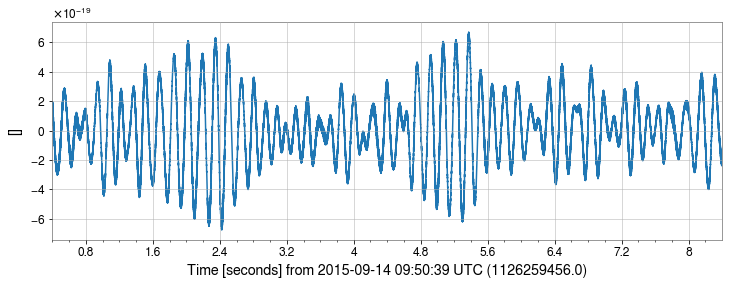

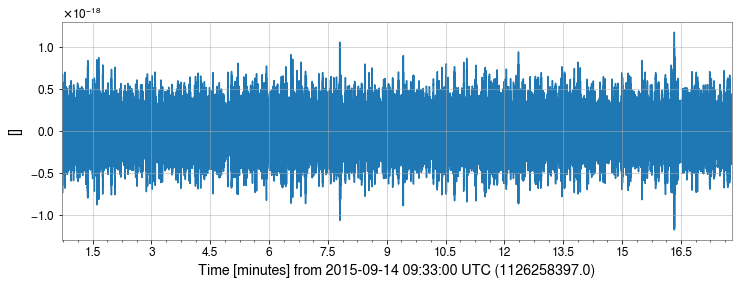

In [19]:
# specify event time and window durations
event = 'GW150914'
event_gps = gwosc.datasets.event_gps(event)
buffer = 2.0  # duration to fetch after event_Gps time
window_duration = 8.0  # seconds
background_duration = 1024.0  # seconds

# fetch data
event = TimeSeries.fetch_open_data(
    ifo='H1',
    start=event_gps+buffer-window_duration,
    end=event_gps+buffer,
    verbose=True,
    cache=True,
)
background = TimeSeries.fetch_open_data(
    ifo='H1',
    start=event_gps+buffer-background_duration,
    end=event_gps+buffer,
    verbose=True,
    cache=True,
)

# display timeseries (; suppresses printing return values)
event.plot();
background.plot();

### Power Spectral Density

Use the "welch" method to estimate the power spectral density. 

Default settings for this method are to use a Hann window, and in each frequency bin to take the median over all segments.

However, we will use a Tukey window, with 0.4 s roll-off, and no overlap, as is described in the LALInference paper (https://arxiv.org/abs/1409.7215).

The `window_duration` used below will be used both for PSD estimation and for the event segment.

In [13]:
# create window function
roll_off = 0.4
alpha = 2 * roll_off / window_duration

w = tukey(int(window_duration * data.sample_rate.value), alpha)

NameError: name 'data' is not defined

In [25]:
# psd = pycbc.psd.estimate.welch(h1_psd, seg_len=int(T * f_s), seg_stride=int(T * f_s / 2), window='hann', avg_method='median')
psd = pycbc.psd.estimate.welch(
    data.to_pycbc(),
    seg_len=int(T * f_s),
    seg_stride=int(T * f_s),
    window=w,
    avg_method='median',
)
plt.figure(figsize=(15,10))
plt.plot(psd.sample_frequencies, psd)
plt.yscale('log')
plt.xlabel('frequency (Hz)')
plt.ylabel('1/Hz')
plt.title('Estimated PSD for GW150914')
plt.xlim((20,1024))
plt.ylim((1e-47, 1e-39))
plt.show()

NameError: name 'h1_psd' is not defined